# Full Training

In [ ]:
  #TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [ ]:
!pip install keras-nlp==0.6.2
!pip install tensorflow==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: ten

In [ ]:
model_name =  "bert_tiny_en_uncased"

In [ ]:
model_name =  "bert_small_en_uncased"

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import keras_nlp
from sklearn.model_selection import train_test_split

Using TensorFlow backend


In [ ]:
# Pretrained classifier.
bert_tiny = keras_nlp.models.BertClassifier.from_preset(
    model_name,
    preprocessor=None,
    num_classes=2,
    load_weights = True,
    activation='sigmoid'
)

17602216/17602216 [==============================] - 0s 0us/step


In [ ]:
# Pretrained classifier.
bert_small = keras_nlp.models.BertClassifier.from_preset(
    model_name,
    preprocessor=None,
    num_classes=2,
    load_weights = True,
    activation='sigmoid'
)

115149824/115149824 [==============================] - 1s 0us/step


In [ ]:
bert_tiny.get_layer('bert_backbone').summary()

Model: "bert_backbone"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 token_ids (InputLayer)      [(None, None)]               0         []                            
                                                                                                  
 token_embedding (Reversibl  (None, None, 128)            3906816   ['token_ids[0][0]']           
 eEmbedding)                                                                                      
                                                                                                  
 segment_ids (InputLayer)    [(None, None)]               0         []                            
                                                                                                  
 position_embedding (Positi  (None, None, 128)            65536     ['token_embedding[

In [ ]:
bert_small.get_layer('bert_backbone_1').summary()

Model: "bert_backbone_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 token_ids (InputLayer)      [(None, None)]               0         []                            
                                                                                                  
 token_embedding (Reversibl  (None, None, 512)            1562726   ['token_ids[0][0]']           
 eEmbedding)                                              4                                       
                                                                                                  
 segment_ids (InputLayer)    [(None, None)]               0         []                            
                                                                                                  
 position_embedding (Positi  (None, None, 512)            262144    ['token_embeddin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# 학습 데이터를 학습용과 검증용으로 분리합니다. 여기서는 20%를 검증 데이터로 사용합니다.
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)


In [ ]:
# 입력층 정의
inputs = tf.keras.Input(shape=(28, 28))

# 첫 번째 레이어: Flatten
x = tf.keras.layers.Flatten()(inputs)

# 두 번째 레이어: Dense
x = tf.keras.layers.Dense(256, activation='relu')(x)

# 세 번째 레이어: Dense
x = tf.keras.layers.Dense(128, activation='relu')(x)

# 네 번째 레이어: Dense
outputs = tf.keras.layers.Dense(10)(x)

# 모델 생성
model = tf.keras.Model(inputs=inputs, outputs=outputs)

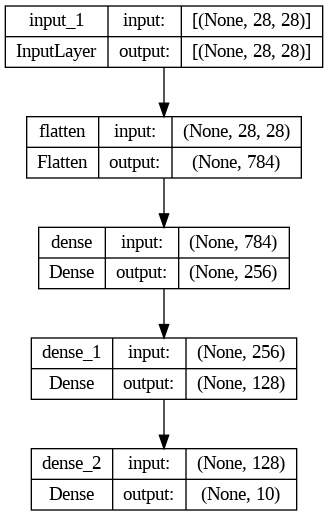

In [ ]:
tf.keras.utils.plot_model(model, "my_model.png", show_shapes=True)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
num_train_images = train_images.shape[0]

In [ ]:
num_train_images

48000

In [ ]:
batch_size = 30
dataset_size = num_train_images

In [ ]:
model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size)

Epoch 1/30
1600/1600 [==============================] - 12s 3ms/step - loss: 0.4953 - accuracy: 0.8197
Epoch 2/30
1600/1600 [==============================] - 4s 3ms/step - loss: 0.3692 - accuracy: 0.8634
Epoch 3/30
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3309 - accuracy: 0.8777
Epoch 4/30
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3075 - accuracy: 0.8857
Epoch 5/30
1600/1600 [==============================] - 4s 3ms/step - loss: 0.2882 - accuracy: 0.8923
Epoch 6/30
1600/1600 [==============================] - 5s 3ms/step - loss: 0.2726 - accuracy: 0.8973
Epoch 7/30
1600/1600 [==============================] - 7s 5ms/step - loss: 0.2595 - accuracy: 0.9027
Epoch 8/30
1600/1600 [==============================] - 5s 3ms/step - loss: 0.2478 - accuracy: 0.9056
Epoch 9/30
1600/1600 [==============================] - 5s 3ms/step - loss: 0.2361 - accuracy: 0.9100
Epoch 10/30
1600/1600 [==============================] - 6s 3ms/step - loss: 0.22

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5087 - accuracy: 0.8824 - 693ms/epoch - 2ms/step

Test accuracy: 0.8823999762535095


In [ ]:
# 모델 저장
model.save("/content/drive/MyDrive/LoRA/original-model")

# LoRA


기존 코드 Dense 에 맞게 변경

이 코드에서 LoraLayer 클래스의 call 메소드는 이제 선택적으로 training 인자를 받고, 이 인자는 레이어가 학습 모드인지 추론 모드인지를 결정하는 데 사용됩니다. training 인자가 명시적으로 제공되지 않은 경우에는 레이어의 내부 training 플래그를 사용합니다.

학습 모드에서는 self.original_layer의 출력에 decay factor를 적용하고 lora_output을 결합합니다. 추론 또는 평가 모드에서는 lora_output만을 사용합니다. 이 방식으로 fit, evaluate, predict 등 모델의 메소드들을 호출할 때 Keras가 자동으로 training 인자를 설정하므로 사용자는 수동으로 이 값을 설정할 필요가 없습니다.

In [ ]:
import math
from tensorflow import keras

class LoraLayer(keras.layers.Layer):
    def __init__(
        self,
        original_layer,
        total_iteration = 1000 ,  # Total number of iterations for the decay
        start_percent=0.05,  # The percentage of total_iteration when decay starts
        end_percent=0.85,  # The percentage of total_iteration when decay ends
        min_decay_factor=0,  # The minimum value that decay factor can take
        rank=64,
        alpha=32,
        trainable=True,
        **kwargs,
    ):
        original_layer_config = original_layer.get_config()
        name = original_layer_config["name"]
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.rank = rank
        self.alpha = alpha
        self._scale = alpha / rank

        self.original_layer = original_layer
        self.original_layer.trainable = False


        self.total_iteration = total_iteration
        self.start_step = int(total_iteration * start_percent)
        self.end_step = int(total_iteration * end_percent)
        self.min_decay_factor = min_decay_factor

        self.current_step = tf.Variable(0, dtype=tf.int32, trainable=False)
        self.decay_factor = tf.Variable(1.0, dtype=tf.float32, trainable=False)

    def build(self, input_shape):
        # LoRA weights.
        self.A_weight = self.add_weight(
            name="lora_A_weight",
            shape=(self.rank, input_shape[-1]),
            initializer=keras.initializers.VarianceScaling(
                scale=math.sqrt(5), mode="fan_in", distribution="uniform"
            ),
            trainable=self.trainable,
        )

        self.B_weight = self.add_weight(
            name="lora_B_weight",
            shape=(self.original_layer.units, self.rank),
            initializer='zeros',
            trainable=self.trainable,
        )
        self.C_weight = self.add_weight(
            name="lora_C_weight",
            shape=(self.original_layer.units,),
            initializer='zeros',
            trainable=self.trainable,
        )

        super().build(input_shape)

    def call(self, inputs, training=None):
            if training is None:
                training = self.trainable

            # Calculate the linear decay factor
            if self.current_step < self.start_step:
                self.decay_factor.assign(1.0)  # Decay has not started yet
            elif self.current_step > self.end_step:
                self.decay_factor.assign(tf.cast(self.min_decay_factor, dtype=tf.float32))  # Ensure float32 type for consistency
            else:
                # Linear decay between start_step and end_step
                self.decay_factor.assign(1.0 - ((tf.cast(self.current_step, dtype=tf.float32) - self.start_step) /
                                        (self.end_step - self.start_step) *
                                        (1.0 - tf.cast(self.min_decay_factor, dtype=tf.float32))))

            # Matrix multiplication for A and B weights with inputs
            lora_A_output = tf.matmul(self.A_weight, tf.transpose(inputs))  # Ax
            lora_output = tf.transpose(tf.matmul(self.B_weight, lora_A_output) * self._scale)  + self.C_weight # BAx Transpose back to [batch_size, original_layer.units]


            if training:
                original_output = self.original_layer(inputs)
                # 평균과 표준편차 계산
                original_weight_matrix = self.original_layer.weights[0]
                original_mean = tf.reduce_mean(original_weight_matrix, axis=0)
                original_variance = tf.reduce_mean(tf.square(original_weight_matrix - original_mean), axis=0)
                original_stddev = tf.sqrt(original_variance)

                # decay_factor가 0.3보다 작으면 noise_mean과 noise_std를 0으로 설정
                noise_mean = tf.where(self.decay_factor < 0.3, 0.0, original_mean * (1 - self.decay_factor))
                noise_std = tf.where(self.decay_factor < 0.3, 0.0, original_stddev * tf.sqrt(1 - tf.square(self.decay_factor)))
                noise = tf.random.normal(tf.shape(original_weight_matrix), mean=noise_mean, stddev=noise_std)

                self.current_step.assign_add(1)

                return original_output * self.decay_factor + lora_output + (inputs @ noise)

            else:
                return lora_output


# LoRA 적용 + Weights 값들 확인
    - W + AB (LoRA_o_model_1, LoRA_o_model_2)


In [ ]:
model_original = tf.keras.models.load_model("/content/drive/MyDrive/LoRA/original-model")

In [ ]:
model_original.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_loss, test_acc = model_original.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3787 - accuracy: 0.8779 - 611ms/epoch - 2ms/step

Test accuracy: 0.8779000043869019


기존 것에 그냥 오버라이딩이 안됨
rank = 64

In [ ]:
epochs = 30

In [ ]:
total_iteration= int(epochs * (dataset_size / batch_size))  # Total number of iterations for the decay

In [ ]:
# Get the original layers by name that you want to replace with LoraLayer
original_layers_to_replace = ['dense', 'dense_1']

# Create a dictionary to hold the LoraLayers corresponding to the original layers
lora_layers = {layer_name: LoraLayer(original_layer=model_original.get_layer(layer_name),
                                      rank=64,
                                      alpha=32,
                                      total_iteration = total_iteration,
                                      trainable=True)
               for layer_name in original_layers_to_replace}

# Create the new model
inputs = model_original.input
x = inputs

# Sequentially get layers from the original model and connect them.
# Replace with LoraLayer when we encounter the specified layers.
for layer in model_original.layers:
    if layer.name in original_layers_to_replace:
        # Use the corresponding LoraLayer
        x = lora_layers[layer.name](x)
    else:
        # If the layer is not meant to be replaced, use the original layer
        layer.trainable = False  # Make sure the original layer is not trainable
        x = layer(x)

# Define the new model with the LoRA layers applied
LoRA_modified_model = keras.Model(inputs=inputs, outputs=x)

# Check the model structure
LoRA_modified_model.summary()

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        multiple                     0         ['input_1[0][0]']             
                                                                                                  
 flatten (Flatten)           (None, 784)                  0         ['input_1[3][0]']             
                                                                                                  
 dense (LoraLayer)           (None, 256)                  267778    ['flatten[3][0]']             
                                                                                                  
 dense_1 (LoraLayer)         (None, 128)                  57602     ['dense[0][0]']               
                                                                                            

In [ ]:
#tf.keras.utils.plot_model(LoRA_modified_model, "my_model.png", show_shapes=True)

In [ ]:
class PrintCurrentStepCallback(keras.callbacks.Callback):
    def __init__(self, lora_layers):
        super().__init__()
        self.lora_layers = lora_layers

    def on_epoch_end(self, epoch, logs=None):
        print()
        for i, lora_layer in enumerate(self.lora_layers):
            current_step = lora_layer.current_step.value()
            decay_factor = lora_layer.decay_factor.value()
            print(f"End of epoch {epoch + 1}, LoraLayer {i}: {current_step} Step")
            print(f"End of epoch {epoch + 1}, LoraLayer {i}: Decay factor: {decay_factor}")

In [ ]:
# 콜백 생성 시 lora_layers 딕셔너리의 값만 사용
print_step_callback = PrintCurrentStepCallback(list(lora_layers.values()))

In [ ]:
class TestCallback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

In [ ]:
class NoiseMeanCallback(keras.callbacks.Callback):
    def __init__(self, lora_layers):
        super().__init__()
        self.lora_layers = lora_layers
        self.noise_means = []

    def on_epoch_end(self, epoch, logs=None):
        epoch_noise_means = []
        for layer in self.lora_layers:
            if isinstance(layer, LoraLayer):
                # LoraLayer의 가중치에 대한 평균 계산
                original_weight_matrix = layer.original_layer.weights[0]
                noise_mean = tf.reduce_mean(original_weight_matrix, axis=0).numpy()
                epoch_noise_means.append(noise_mean)
        self.noise_means.append(epoch_noise_means)


In [ ]:
LoRA_modified_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
noise_mean_callback = NoiseMeanCallback(lora_layers)

history = LoRA_modified_model.fit(train_images, train_labels,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  validation_data=(val_images, val_labels),
                                  callbacks=[print_step_callback, TestCallback((val_images, val_labels)), noise_mean_callback])


Epoch 1/30
1595/1600 [============================>.] - ETA: 0s - loss: 0.2101 - accuracy: 0.9193
End of epoch 1, LoraLayer 0: 1600 Step
End of epoch 1, LoraLayer 0: Decay factor: 1.0
End of epoch 1, LoraLayer 1: 1600 Step
End of epoch 1, LoraLayer 1: Decay factor: 1.0

Testing loss: 2.369999408721924, acc: 0.10566666722297668

1600/1600 [==============================] - 13s 8ms/step - loss: 0.2101 - accuracy: 0.9193 - val_loss: 2.3700 - val_accuracy: 0.1057
Epoch 2/30
1600/1600 [==============================] - ETA: 0s - loss: 0.1995 - accuracy: 0.9243
End of epoch 2, LoraLayer 0: 3200 Step
End of epoch 2, LoraLayer 0: Decay factor: 0.9791666865348816
End of epoch 2, LoraLayer 1: 3200 Step
End of epoch 2, LoraLayer 1: Decay factor: 0.9791666865348816

Testing loss: 2.4589195251464844, acc: 0.07616666704416275

1600/1600 [==============================] - 8s 5ms/step - loss: 0.1995 - accuracy: 0.9243 - val_loss: 2.4589 - val_accuracy: 0.0762
Epoch 3/30
1589/1600 [====================

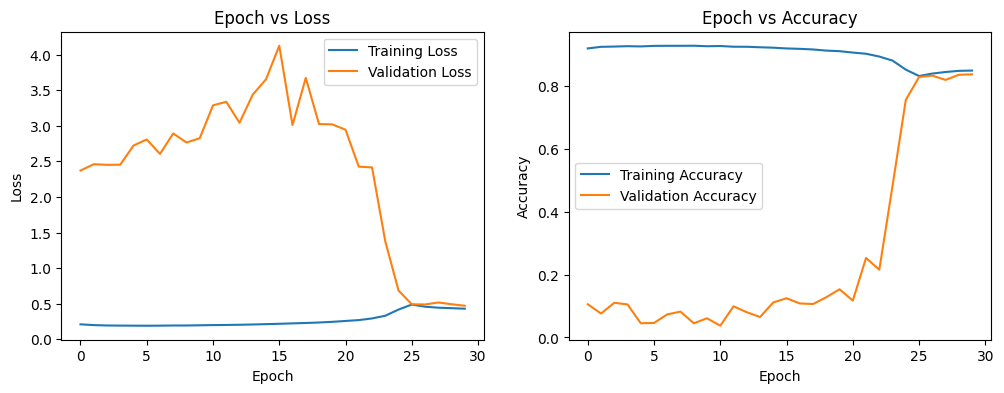

In [ ]:
import matplotlib.pyplot as plt

# 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# noise_mean_callback.noise_means 에는 각 LoraLayer의 noise_mean 값이 에폭 별로 저장되어 있습니다.
# 각 LoraLayer의 noise_mean 시각화
for layer_index in range(len(noise_mean_callback.noise_means[0])):
    # 각 LoraLayer에 대한 noise_mean 값 추출
    layer_noise_means = [epoch[layer_index] for epoch in noise_mean_callback.noise_means]

    plt.figure(figsize=(10, 6))
    plt.plot(layer_noise_means)
    plt.title(f'Epoch vs Noise Mean for LoraLayer {layer_index}')
    plt.xlabel('Epoch')
    plt.ylabel('Noise Mean')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 각 LoraLayer의 decay factor 시각화
for i, layer_decay_factors in enumerate(zip(*decay_factor_callback.decay_factors)):
    plt.plot(layer_decay_factors, label=f'LoraLayer {i}')

plt.title('Epoch vs Decay Factor')
plt.xlabel('Epoch')
plt.ylabel('Decay Factor')
plt.legend()
plt.show()


NameError: ignored

In [ ]:
# 모델 학습을 시작합니다. 이제 검증 데이터로 val_images와 val_labels를 사용합니다.
LoRA_modified_model.fit(train_images, train_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(val_images, val_labels),
                        callbacks=[print_step_callback, TestCallback((val_images,val_labels))])


Epoch 1/30
1596/1600 [============================>.] - ETA: 0s - loss: 1.5739 - accuracy: 0.5965
End of epoch 1, LoraLayer 0: 7600 Step
End of epoch 1, LoraLayer 0: Decay factor: 0.9666666984558105
End of epoch 1, LoraLayer 1: 7600 Step
End of epoch 1, LoraLayer 1: Decay factor: 0.9666666984558105
End of epoch 1, LoraLayer 2: 7600 Step
End of epoch 1, LoraLayer 2: Decay factor: 0.9666666984558105

Testing loss: 2.2994821071624756, acc: 0.10441666841506958

1600/1600 [==============================] - 16s 9ms/step - loss: 1.5724 - accuracy: 0.5967 - val_loss: 2.2995 - val_accuracy: 0.1044
Epoch 2/30
1591/1600 [============================>.] - ETA: 0s - loss: 0.7698 - accuracy: 0.7397
End of epoch 2, LoraLayer 0: 9200 Step
End of epoch 2, LoraLayer 0: Decay factor: 0.9333333373069763
End of epoch 2, LoraLayer 1: 9200 Step
End of epoch 2, LoraLayer 1: Decay factor: 0.9333333373069763
End of epoch 2, LoraLayer 2: 9200 Step
End of epoch 2, LoraLayer 2: Decay factor: 0.9333333373069763

Te

In [ ]:
test_loss, test_acc = LoRA_modified_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.6926 - accuracy: 0.7622 - 3s/epoch - 9ms/step

Test accuracy: 0.7621999979019165


## lora ouput decay factor 로 나누지 않음.  

현상도 유사함  Epoch 24/30

In [ ]:
# 모델 학습을 시작합니다. 이제 검증 데이터로 val_images와 val_labels를 사용합니다.
LoRA_modified_model.fit(train_images, train_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(val_images, val_labels),
                        callbacks=[print_step_callback, TestCallback((val_images,val_labels))])


Epoch 1/30
1590/1600 [============================>.] - ETA: 0s - loss: 0.1343 - accuracy: 0.9473
End of epoch 1, LoraLayer 0: 7600 Step
End of epoch 1, LoraLayer 0: Decay factor: 0.9666666984558105
End of epoch 1, LoraLayer 1: 7600 Step
End of epoch 1, LoraLayer 1: Decay factor: 0.9666666984558105
End of epoch 1, LoraLayer 2: 7600 Step
End of epoch 1, LoraLayer 2: Decay factor: 0.9666666984558105

Testing loss: 2.3026435375213623, acc: 0.11733333021402359

1600/1600 [==============================] - 12s 6ms/step - loss: 0.1342 - accuracy: 0.9475 - val_loss: 2.3026 - val_accuracy: 0.1173
Epoch 2/30
1596/1600 [============================>.] - ETA: 0s - loss: 0.1285 - accuracy: 0.9501
End of epoch 2, LoraLayer 0: 9200 Step
End of epoch 2, LoraLayer 0: Decay factor: 0.9333333373069763
End of epoch 2, LoraLayer 1: 9200 Step
End of epoch 2, LoraLayer 1: Decay factor: 0.9333333373069763
End of epoch 2, LoraLayer 2: 9200 Step
End of epoch 2, LoraLayer 2: Decay factor: 0.9333333373069763

Te

In [ ]:
test_loss, test_acc = LoRA_modified_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.7068 - accuracy: 0.7554 - 806ms/epoch - 3ms/step

Test accuracy: 0.7554000020027161


## lora ouput decay factor 로 나눔 -> 제대로 학습 되지 않음

In [ ]:
# 모델 학습을 시작합니다. 이제 검증 데이터로 val_images와 val_labels를 사용합니다.
LoRA_modified_model.fit(train_images, train_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(val_images, val_labels),
                        callbacks=[print_step_callback, TestCallback((val_images,val_labels))])


Epoch 1/30
1277/1280 [============================>.] - ETA: 0s - loss: 0.1359 - accuracy: 0.9472
End of epoch 1, LoraLayer 0: 7280 Step
End of epoch 1, LoraLayer 0: Decay factor: 0.9733333587646484
End of epoch 1, LoraLayer 1: 7280 Step
End of epoch 1, LoraLayer 1: Decay factor: 0.9733333587646484
End of epoch 1, LoraLayer 2: 7280 Step
End of epoch 1, LoraLayer 2: Decay factor: 0.9733333587646484

Testing loss: 17.393165588378906, acc: 0.08114583045244217

1280/1280 [==============================] - 13s 9ms/step - loss: 0.1361 - accuracy: 0.9471 - val_loss: 17.3932 - val_accuracy: 0.0811
Epoch 2/30
1279/1280 [============================>.] - ETA: 0s - loss: 0.1291 - accuracy: 0.9499
End of epoch 2, LoraLayer 0: 8560 Step
End of epoch 2, LoraLayer 0: Decay factor: 0.9466666579246521
End of epoch 2, LoraLayer 1: 8560 Step
End of epoch 2, LoraLayer 1: Decay factor: 0.9466666579246521
End of epoch 2, LoraLayer 2: 8560 Step
End of epoch 2, LoraLayer 2: Decay factor: 0.9466666579246521

T

In [ ]:
test_loss, test_acc = LoRA_modified_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)